In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def analyze_csv(J, K, p, csv_path=None):
    """
    Read simulation results from the CSV file for matrices of size J x K and probability p,
    aggregate the average runtime and average proportion identifiable across seeds,
    and plot the branches distribution.

    Parameters:
      J (int): Number of rows.
      K (int): Number of columns.
      p (float): Bernoulli probability used in simulation.
      csv_path (str): Optional path to the CSV file. If not provided, uses
                      "data/runtime_expr_results_J{J}_K{K}.csv".

    Returns:
      dict: A dictionary containing overall average runtime, average prop_identifiable,
            and the average branch distribution (as a dict).
    """
    if csv_path is None:
        csv_path = f"idQ_expr_J{J}_K{K}_p{p}.csv"
    # Read the CSV file into a DataFrame.
    df = pd.read_csv(csv_path)
    
    # If the CSV contains rows with different p values, filter for our specified p.
    df = df[df['p'] == p]
    
    # Compute overall average runtime and prop_identifiable across seeds.
    avg_runtime = df['avg_runtime'].mean()
    avg_prop_identifiable = df['prop_identifiable'].mean()
    
    # The CSV includes separate branch count columns: 'branch_-1', 'branch_0', ..., 'branch_6'.
    branch_cols = [f'branch_{i}' for i in [-1, 0, 1, 2, 3, 4, 5, 6]]
    branch_distribution = df[branch_cols].mean()  # Average count for each branch across seeds

    # Plot the branch distribution as a bar chart.
    plt.figure(figsize=(8, 4))
    branch_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Branch')
    plt.ylabel('Average Count per Seed')
    plt.title(f'Branch Distribution for J={J}, K={K}, p={p}')
    plt.tight_layout()
    plt.show()

    # Return results as a dictionary.
    return {
        'avg_runtime': avg_runtime,
        'avg_prop_identifiable': avg_prop_identifiable,
        'branch_distribution': branch_distribution.to_dict()
    }


In [5]:
J = 12
K = 7
p = 0.1

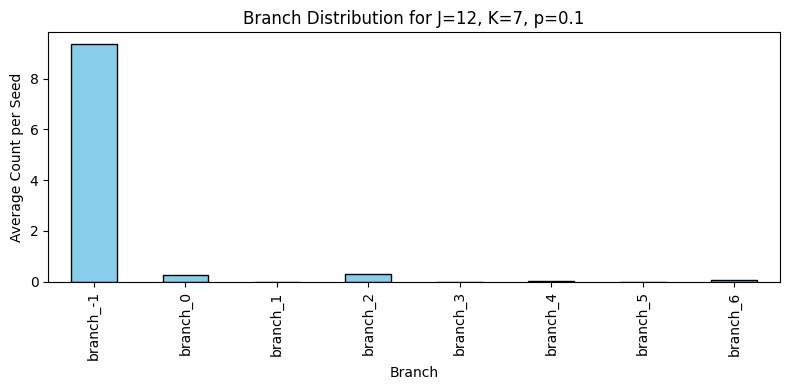

{'avg_runtime': 0.0009977762175655404,
 'avg_prop_identifiable': 0.008536585365853657,
 'branch_distribution': {'branch_-1': 9.353658536585366,
  'branch_0': 0.24390243902439024,
  'branch_1': 0.0,
  'branch_2': 0.3170731707317073,
  'branch_3': 0.0,
  'branch_4': 0.024390243902439025,
  'branch_5': 0.0,
  'branch_6': 0.06097560975609756}}

In [7]:
analyze_csv(J, K, p)

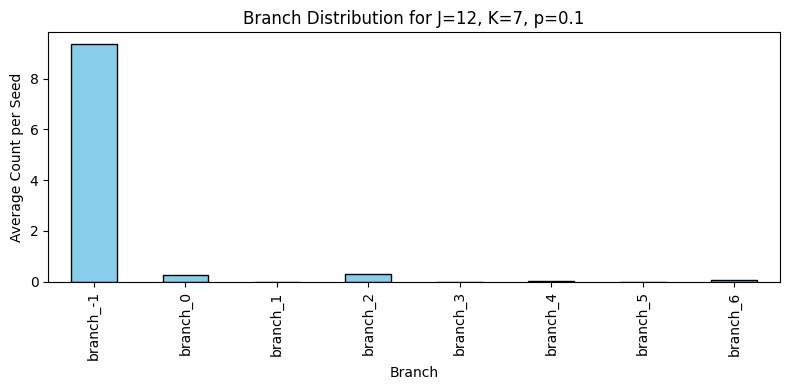

{'avg_runtime': 0.0009977762175655404,
 'avg_prop_identifiable': 0.008536585365853657,
 'branch_distribution': {'branch_-1': 9.353658536585366,
  'branch_0': 0.24390243902439024,
  'branch_1': 0.0,
  'branch_2': 0.3170731707317073,
  'branch_3': 0.0,
  'branch_4': 0.024390243902439025,
  'branch_5': 0.0,
  'branch_6': 0.06097560975609756}}

In [9]:
analyze_csv(J = 12, K = 7, p = 0.1)

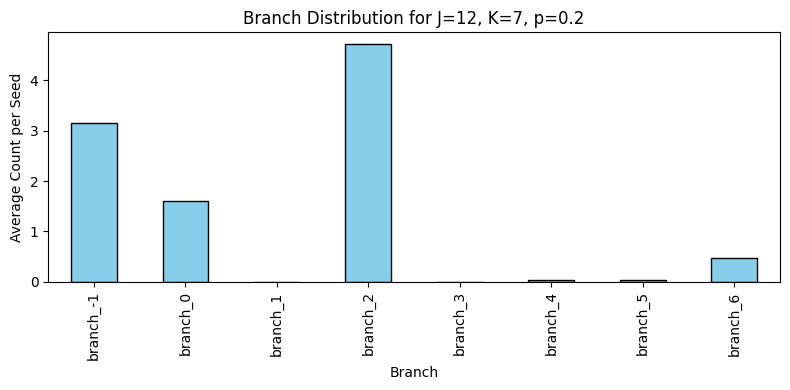

{'avg_runtime': 41.50227061608464,
 'avg_prop_identifiable': 0.049462365591397835,
 'branch_distribution': {'branch_-1': 3.150537634408602,
  'branch_0': 1.6021505376344085,
  'branch_1': 0.0,
  'branch_2': 4.720430107526882,
  'branch_3': 0.0,
  'branch_4': 0.03225806451612903,
  'branch_5': 0.03225806451612903,
  'branch_6': 0.46236559139784944}}

In [10]:
analyze_csv(J = 12, K = 7, p = 0.2)

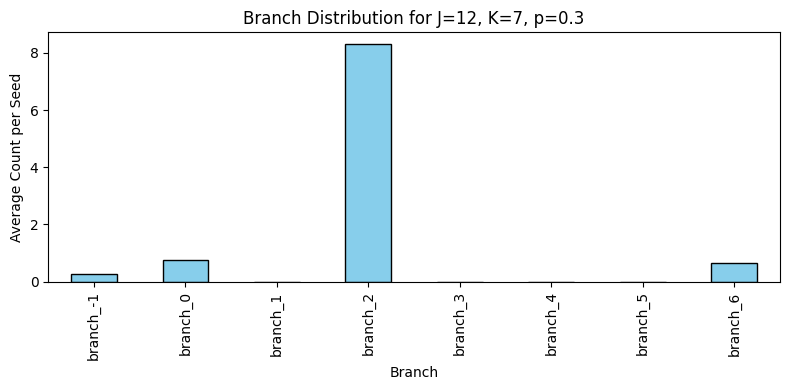

{'avg_runtime': 43.08111894069991,
 'avg_prop_identifiable': 0.06538461538461539,
 'branch_distribution': {'branch_-1': 0.2692307692307692,
  'branch_0': 0.7692307692307693,
  'branch_1': 0.0,
  'branch_2': 8.307692307692308,
  'branch_3': 0.0,
  'branch_4': 0.0,
  'branch_5': 0.0,
  'branch_6': 0.6538461538461539}}

In [11]:
analyze_csv(J = 12, K = 7, p = 0.3)

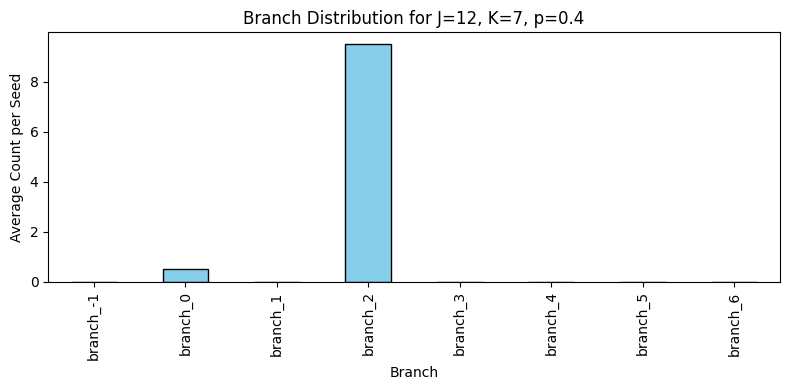

{'avg_runtime': 0.0012010350357741,
 'avg_prop_identifiable': 0.0,
 'branch_distribution': {'branch_-1': 0.0,
  'branch_0': 0.5,
  'branch_1': 0.0,
  'branch_2': 9.5,
  'branch_3': 0.0,
  'branch_4': 0.0,
  'branch_5': 0.0,
  'branch_6': 0.0}}

In [12]:
analyze_csv(J = 12, K = 7, p = 0.4)

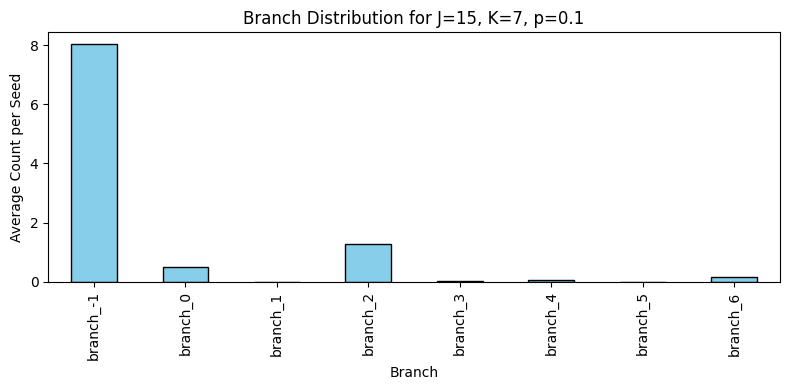

{'avg_runtime': 0.003011936845547104,
 'avg_prop_identifiable': 0.01818181818181818,
 'branch_distribution': {'branch_-1': 8.04040404040404,
  'branch_0': 0.494949494949495,
  'branch_1': 0.0,
  'branch_2': 1.2727272727272727,
  'branch_3': 0.010101010101010102,
  'branch_4': 0.04040404040404041,
  'branch_5': 0.0,
  'branch_6': 0.1414141414141414}}

In [13]:
analyze_csv(J = 15, K = 7, p = 0.1)

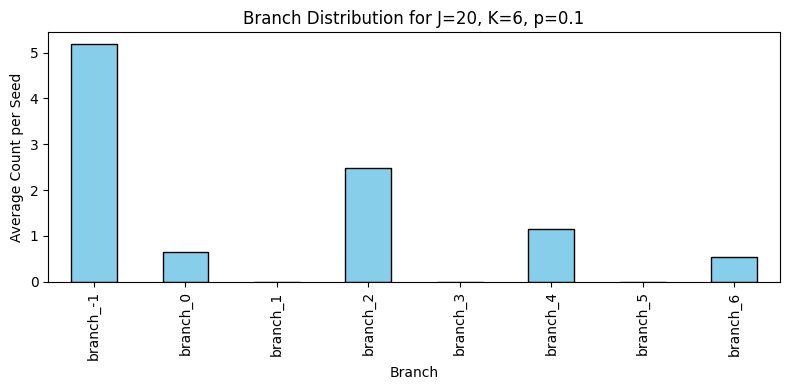

{'avg_runtime': 0.0038435807527631653,
 'avg_prop_identifiable': 0.1683673469387755,
 'branch_distribution': {'branch_-1': 5.183673469387755,
  'branch_0': 0.6530612244897959,
  'branch_1': 0.0,
  'branch_2': 2.479591836734694,
  'branch_3': 0.0,
  'branch_4': 1.1428571428571428,
  'branch_5': 0.0,
  'branch_6': 0.5408163265306123}}

In [4]:
analyze_csv(J = 20, K = 6, p = 0.1)

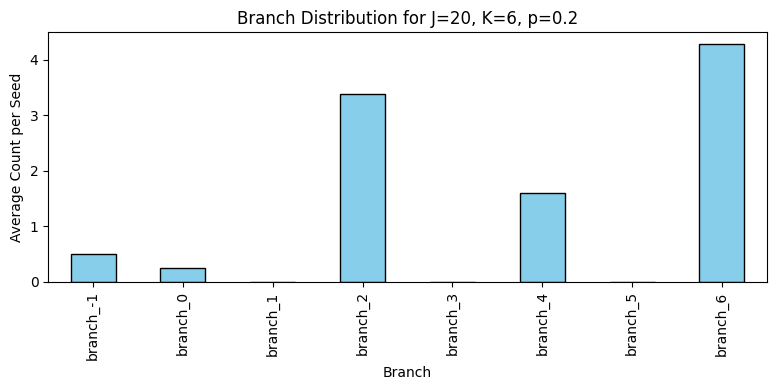

{'avg_runtime': 6.985073016502116,
 'avg_prop_identifiable': 0.5881720430107527,
 'branch_distribution': {'branch_-1': 0.5053763440860215,
  'branch_0': 0.23655913978494625,
  'branch_1': 0.0,
  'branch_2': 3.3763440860215055,
  'branch_3': 0.0,
  'branch_4': 1.6021505376344085,
  'branch_5': 0.0,
  'branch_6': 4.279569892473118}}

In [3]:
analyze_csv(J = 20, K = 6, p = 0.2)

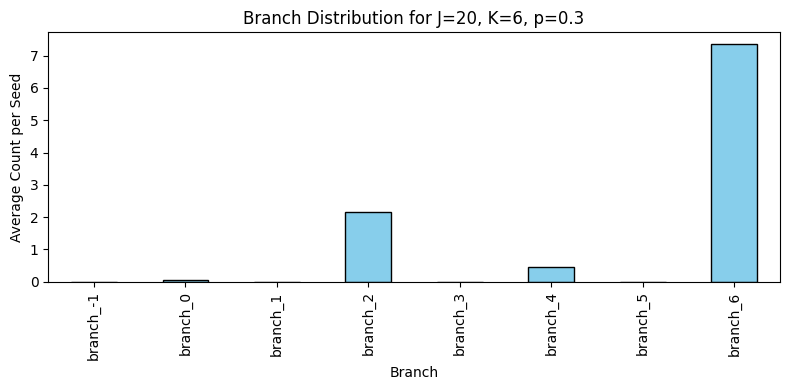

{'avg_runtime': 38.385249682280744,
 'avg_prop_identifiable': 0.7821428571428569,
 'branch_distribution': {'branch_-1': 0.0,
  'branch_0': 0.03571428571428571,
  'branch_1': 0.0,
  'branch_2': 2.142857142857143,
  'branch_3': 0.0,
  'branch_4': 0.4642857142857143,
  'branch_5': 0.0,
  'branch_6': 7.357142857142857}}

In [5]:
analyze_csv(J = 20, K = 6, p = 0.3)